In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

Instead of importing the vision_benchmarks.py file, I imported a final version of the file that contains the most recently optimized parameters (ie, the parameters obtained from the individual optimizations of all individual parameters). Since the inital iteration of the result_feedback notebook had resulted in negative values, I decided to optimize the parameters in the motor system before re-running the optimization for the result_feedback parameter (reasons for this can be found in the first result_feedback notebook). 

After this optimization runs, the result_feedback parameter in the vision_benchmarks_final.py file will be replaced with the value that this notebook finds. After that, a final test will be done to compare the inidivdually optimized parameter results with biological data. You can find it in the notebook titled "final_FINAL_test".

In [3]:
import vision_benchmarks_final
reload (vision_benchmarks_final)

<module 'vision_benchmarks_final' from '../vision_benchmarks_final.pyc'>

In [5]:
def objective(x):
    vals = vision_benchmarks_final.Vision_Model().run(
        result_feedback = x['result_feedback']
        #compare_to_result_strength = x['compare_to_result_strength']
    )
    return {
        'loss': 
            abs(vals['AIT_to_PFC'] - 0.03) + abs(vals['PFC_to_PMC'] - 0.02) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'compare_to_result_strength': hp.uniform('compare_to_result_strength', 0, 1),
                     'result_feedback': hp.uniform('result_feedback', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('result_feedback_data_postmotor', 'w'))

running Vision_Model#20160803-141617-558d29a1
Simulation finished in 0:00:29.                                                 
_runtime = 2
_result_feedback = 0.6964691855978616
_compare_to_result_strength = 0.1416302690767407
_D = 32
_motor_feedback = 0.13055354933808305
_motor_transform = 2.0
_finger_feedback = 0.6964691855978616
_motor_to_fingers_strength = 0.8333928248007452
_AIT_V1_strength = 0.10606490595473272
_V1_r_transform = 0.10606490595473272
_AIT_r_transform = 0.6964691855978616
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.021000000000000001
MC_to_finger = -0.038000000000000006
PFC_to_PMC = 0.08900000000000001
PMC_to_MC = -0.009000000000000008
V1_to_AIT = 0.023
finger_to_end = 0.019000000000000003
retina_to_V1 = 0.0050000000000000001
running Vision_Model#20160803-141705-7739df34
Simulation finished in 0:00:27.                                                 
_runtime = 2
_result_feedback = 0.10606490595473272
_compare_to_result

In [6]:
print(best)

{'result_feedback': 0.46003873368799186}


How does this compare to the value provided by the multi-variabkle hyperopt? It's vert close - the origioal value was 0.4195086163487056.

In [8]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

Since this is running a different version of the benchmarks file (it has more recent parameters), I only need to filter based on one criterion.

In [10]:
df = df[df._AIT_V1_strength == 0.10606490595473272]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
3,0.021,0.040,0.004,0.021,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.093257,2,1,0.032,0.005
4,0.021,-0.050,0.149,-0.061,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.902062,2,1,0.019,0.005
17,0.021,-0.048,0.107,-0.018,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.811404,2,1,0.018,0.005
19,0.021,0.021,0.004,0.026,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.283042,2,1,0.039,0.005
25,0.021,0.040,0.004,0.021,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.106065,2,1,0.032,0.005
42,0.021,0.029,0.004,0.020,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.218427,2,1,0.039,0.005
47,0.021,-0.017,0.038,0.022,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.523833,2,1,0.025,0.005
55,0.021,-0.050,0.144,-0.056,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.876567,2,1,0.020,0.005
65,0.021,0.012,0.004,0.033,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.356983,2,1,0.036,0.005
66,0.021,-0.045,0.090,-0.005,0.023,0.106065,0.696469,32,0.106065,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.130554,0.833393,2,0.747906,2,1,0.023,0.005


Now we look at the same graphs as the previous notebooks and look for negative numbers. 

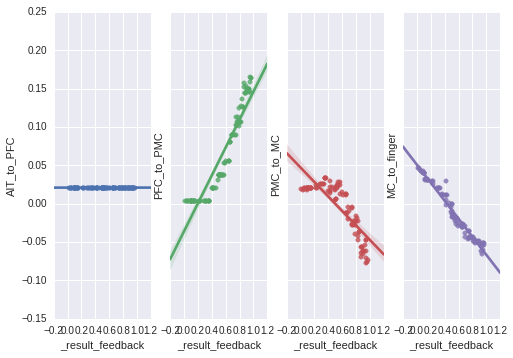

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, sharey = True)
x = '_result_feedback'
sns.regplot(x, y = 'AIT_to_PFC', ax = ax1, data = df)
sns.regplot(x, y = 'PFC_to_PMC', ax = ax2, data = df)
sns.regplot(x, y = 'PMC_to_MC', ax = ax3, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax4, data = df)

Success! There are less negative numbers now. Amazing. Its still looks like the PMC_to_MC and MC_to_finger parameters are still negative when result_feedback is greater than 0.6. I guess next steps would be to figure out what's going on (ie which parameters are interfering with eachother here) and optimize over those. 